Sistema determinado. Solución exacta:
x = [2.  1.8 0.4]


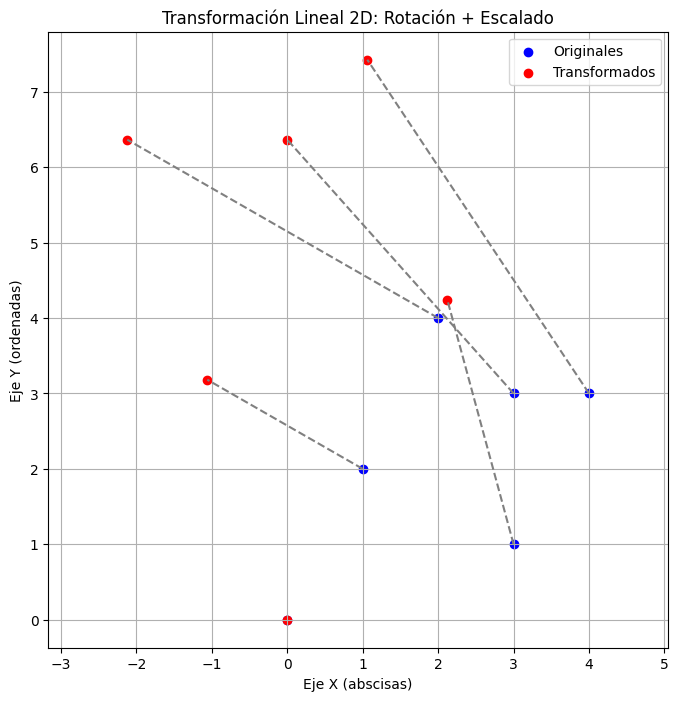

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Resolución de sistema Ax = b

# Definición de la matriz A y el vector b
A = np.array([[3, -1, 2], [1, 2, 1], [2, 1, 3]], dtype=float)

b = np.array([5, 6, 7], dtype=float)


# Función para resolver el sistema Ax = b
def resolver_sistema(A, b):
    """
    Se resuelve el sistema de ecuaciones lineales Ax = b.
    Usa np.linalg.solve si el sistema está bien determinado,
    y np.linalg.lstsq si está sobredeterminado o subdeterminado.

    Parámetros:
    A (nparray): Matriz de coeficientes.
    b (ndarray): Vector del lado derecho.

    Retorno:
    x (ndarray): Solución del sistema.
    """
    try:
        x = np.linalg.solve(A, b)
        print("Sistema determinado. Solución exacta:")
    except np.linalg.LinAlgError:
        x, *_ = np.linalg.lstsq(A, b, rcond=None)
        print("Sistema no determinado. Solución por mínimos cuadrados:")
    print("x =", x)
    return x


# Resolviendo el sistema
x = resolver_sistema(A, b)

# PARTE 2: Transformaciones 2D

# Ángulo y escalado
angulo_deg = 45
angulo_rad = np.radians(angulo_deg)
factor_escala = 1.5

# Matriz de rotación
R = np.array([[np.cos(angulo_rad), -np.sin(angulo_rad)], [np.sin(angulo_rad), np.cos(angulo_rad)]])

# Matriz de escalado
S = np.array([[factor_escala, 0], [0, factor_escala]])

# Matriz de transformación compuesta T = S @ R
T = S @ R

# Puntos originales
puntos = np.array([[1, 2], [3, 1], [2, 4], [4, 3], [0, 0], [3, 3]], dtype=float)

# Aplicar transformación a los puntos
puntos_transformados = puntos @ T.T


# Visualización
def graficar_transformacion(p_originales, p_transformados):
    """
    Grafica los puntos originales y los transformados,
    conectando cada par con una línea.

    Parámetros:
    p_originales (ndarray): Matriz de puntos originales (n x 2).
    p_transformados (ndarray): Matriz de puntos transformados (n x 2).
    """
    plt.figure(figsize=(8, 8))
    plt.scatter(p_originales[:, 0], p_originales[:, 1], color="blue", label="Originales")
    plt.scatter(p_transformados[:, 0], p_transformados[:, 1], color="red", label="Transformados")

    # Líneas que conectan cada punto original con su transformado
    for i in range(len(p_originales)):
        plt.plot([p_originales[i, 0], p_transformados[i, 0]], [p_originales[i, 1], p_transformados[i, 1]], color="gray", linestyle="--")

    plt.title("Transformación Lineal 2D: Rotación + Escalado")
    plt.xlabel("Eje X (abscisas)")
    plt.ylabel("Eje Y (ordenadas)")
    plt.legend()
    plt.grid(True)
    plt.axis("equal")
    plt.show()


# Mostrar la gráfica
graficar_transformacion(puntos, puntos_transformados)
